In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as lite
import pandas as pd
import tables as tb
from IPython.display import clear_output
import csv
import quandl
from scipy import stats
import time
from modules.factory import ohlc_chart 

In [3]:
np.random.seed(777)
METAFILE = '../data/SCF-meta.csv'
quandl.ApiConfig.api_key = "UzB-e5CDdoACq4ENxbVS"

In [4]:
# quandl에서 backward panama adjusted continuous contracts 자료 받기
df = pd.read_csv(METAFILE)
df['iid'] = 'SCF/'+df.Exchange+'_'+df.Symbol+'1_OB'
meta = df[['iid','name']]

In [5]:
meta.head()

,iid,name
0,SCF/CME_CL1_OB,NYMEX WTI Crude Oil
1,SCF/CME_LN1_OB,CME Lean Hogs
2,SCF/CME_W1_OB,CBOT Wheat
3,SCF/CME_NK1_OB,CME Nikkei 225
4,SCF/CME_S1_OB,CBOT Soybeans


In [6]:
WINDOW = 60

SHFE Aluminium


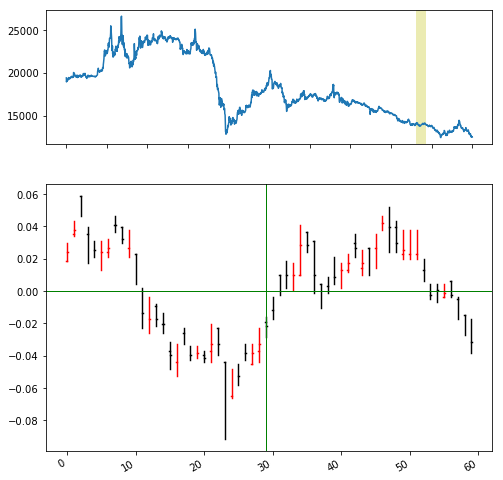

하락(0), 기타(1),  상승(2): q


In [7]:
while True:
    idx = np.random.randint(0, len(meta))
    code = meta.iloc[idx].iid
    name = meta.iloc[idx]['name']

    raw_data = quandl.get(code)
    raw_data.drop(['Volume', 'Prev. Day Open Interest'], axis=1, inplace=True)
    std = raw_data.Settle.std()
    length = len(raw_data)
    
    for i in range(10):
        print(name)
        
        #시작일자 랜덤 설정
        start = np.random.randint(0, length -  WINDOW)
        end = start + WINDOW

        #Data Normalization
        data = raw_data[start:end]
        data = (data-data.Settle.mean())/std
        data.insert(0, 'index', np.arange(len(data)))
        
        #그래프 
        fig, (ax) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 2]}, figsize=(8,9))
        fig.autofmt_xdate()
            
        ax[0].plot(raw_data.index.values, raw_data.Settle.values)
        ax[0].axvspan(raw_data.index.values[start], raw_data.index.values[end], facecolor='y', alpha=0.3)
        
        ohlc_chart(ax[1], data.values, linewidth=1.44)
        plt.show()
        
        #추세 입력
        time.sleep(0.1)
        trend = input("하락(0), 기타(1),  상승(2): ")
        if trend == 'q' or trend == 'n':
            break
        elif trend in ['0','1','2']:
            seq = np.array([[int(trend)], [int(trend)], [int(trend)], [int(trend)]])
            data.drop('index', axis=1, inplace=True)
            row = np.hstack((data.values.T, seq))
            
            with open('../data/uptrend-globalstd(60days).csv', 'ab') as file:
                np.savetxt(file, row, fmt='%.7f', delimiter=',')
        
        clear_output(wait=True)
    if trend == 'q':
            break
    clear_output(wait=True)

In [29]:
d = np.genfromtxt('data/120day_trend(normed_by_globalstd)_2.csv', delimiter=',')